# Exploring Covid case data

In [12]:
!pip install pinotdb

In [3]:
from pinotdb import connect
import pandas as pd
pd.options.plotting.backend = "matplotlib"
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [6]:
conn = connect(host='pinot-covid-cases', port=8000, path='/query/sql', scheme='http')

In [7]:
curs = conn.cursor()
curs.execute("""
    SELECT count(*)
    FROM cases 
""")
for row in curs:
    print(row)

[3234594]


In [13]:
curs = conn.cursor()
curs.execute("""
    SELECT * 
    FROM cases 
    LIMIT 10
""")
for row in curs:
    print(row)

['00_04', 'E06000003', 'Redcar and Cleveland', 0, '2021-06-16']
['00_59', 'E06000003', 'Redcar and Cleveland', 15, '2021-06-16']
['05_09', 'E06000003', 'Redcar and Cleveland', 0, '2021-06-16']
['10_14', 'E06000003', 'Redcar and Cleveland', 1, '2021-06-16']
['15_19', 'E06000003', 'Redcar and Cleveland', 1, '2021-06-16']
['20_24', 'E06000003', 'Redcar and Cleveland', 2, '2021-06-16']
['25_29', 'E06000003', 'Redcar and Cleveland', 2, '2021-06-16']
['30_34', 'E06000003', 'Redcar and Cleveland', 2, '2021-06-16']
['35_39', 'E06000003', 'Redcar and Cleveland', 2, '2021-06-16']
['40_44', 'E06000003', 'Redcar and Cleveland', 0, '2021-06-16']


## Cases by area

In [18]:
curs.execute("""
    SELECT areaName, sum(cases) AS totalCases
    FROM cases 
    GROUP BY areaName
    ORDER BY totalCases DESC    
    LIMIT 10
""")

df_by_area = pd.DataFrame(curs, columns=["areaName", "numberOfCases"])
df_by_area.to_csv("top_areas.csv", index=False)
df_by_area

,areaName,numberOfCases
0,Birmingham,210443.0
1,Leeds,134366.0
2,Manchester,118021.0
3,Bradford,104650.0
4,Liverpool,100411.0
5,Sheffield,90652.0
6,County Durham,79115.0
7,Leicester,77274.0
8,Kirklees,74164.0
9,Newham,72602.0


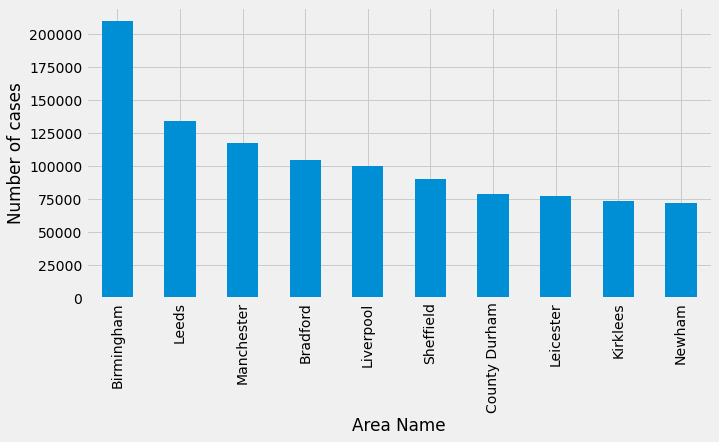

In [29]:
ax = df_by_area.plot(
    kind="bar", 
    x="areaName", 
    y="numberOfCases", 
    legend=None,
    figsize=(10, 5)
)

ax.set(xlabel="Area Name", ylabel="Number of cases")
ax

## Cases by age group by area

In [179]:
area_name="Sutton"
curs.execute(f"""
    SELECT "date", sum(cases) AS totalCases
    FROM cases 
    WHERE areaName = '{area_name}'
    GROUP BY "date"
    ORDER BY "date"    
    LIMIT 1000
""")

df_by_date = pd.DataFrame(curs, columns=["date", "numberOfCases"])
df_by_date

,date,numberOfCases
0,2020-03-04,2.0
1,2020-03-05,0.0
2,2020-03-06,2.0
3,2020-03-07,2.0
4,2020-03-08,0.0
...,...,...
457,2021-06-04,26.0
458,2021-06-05,16.0
459,2021-06-06,18.0
460,2021-06-07,38.0


In [21]:
ax = df_by_date.plot(
    kind="line", 
    x="date", 
    y="numberOfCases", 
    legend=None,
    figsize=(10, 5),
    linewidth=1
)

ax.set(xlabel="Area Name", ylabel="Number of cases")
ax

NameError: name 'df_by_date' is not defined

In [182]:
curs = conn.cursor()
curs.execute("""
    SELECT * FROM airlineStats LIMIT 5
""")
for row in curs:
    print(row)

DatabaseError: {'errorCode': 410, 'message': 'BrokerResourceMissingError'}